In [27]:

# pip install --upgrade keras


In [1]:
import numpy as np
import pandas as pd 
import tensorflow as tf
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import os
#from tensorflow.keras.applications import ResNet50
#from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
#from tensorflow.keras.applications import MobileNetV2
#from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications import VGG16
for dirname, _, filenames in os.walk('"D:\dimi\Tugas semester 6\Bangkit\Capstone\processed_images_new"'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)  

test_datagen = ImageDataGenerator(rescale=1./255)

batch_size = 32

train_generator = train_datagen.flow_from_directory(
    'processed_images_new/train/',
    target_size=(200, 200),
    batch_size=batch_size,
    class_mode='binary'  
)

test_generator = test_datagen.flow_from_directory(
    'processed_images_new/test/',
    target_size=(200, 200),
    batch_size=batch_size,
    class_mode='binary'
)

Found 947 images belonging to 2 classes.
Found 236 images belonging to 2 classes.




Epoch 1/100


30/30 [==============================] - 183s 6s/step - loss: 0.6645 - accuracy: 0.6199 - val_loss: 0.5097 - val_accuracy: 0.8686
Epoch 2/100
30/30 [==============================] - 169s 6s/step - loss: 0.5175 - accuracy: 0.7698 - val_loss: 0.3953 - val_accuracy: 0.8856
Epoch 3/100
30/30 [==============================] - 161s 5s/step - loss: 0.4090 - accuracy: 0.8384 - val_loss: 0.3332 - val_accuracy: 0.8941
Epoch 4/100
30/30 [==============================] - 162s 5s/step - loss: 0.3734 - accuracy: 0.8490 - val_loss: 0.2937 - val_accuracy: 0.9110
Epoch 5/100
30/30 [==============================] - 162s 5s/step - loss: 0.3256 - accuracy: 0.8828 - val_loss: 0.2695 - val_accuracy: 0.9237
Epoch 6/100
30/30 [==============================] - 163s 5s/step - loss: 0.3098 - accuracy: 0.8870 - val_loss: 0.2519 - val_accuracy: 0.9322
Epoch 7/100
30/30 [==============================] - 163s 5s/step - loss: 0.2853 - accuracy: 0.8891 - val_loss: 0.2337 - val_accuracy: 0.9280
Ep

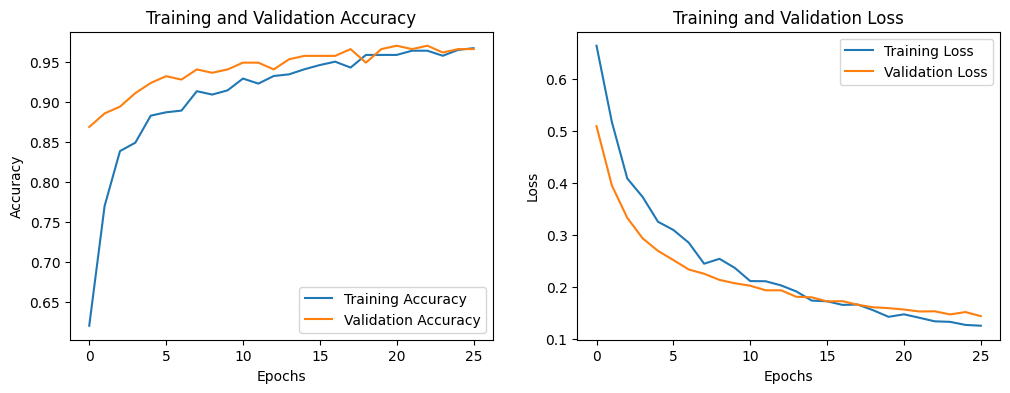

8/8 [==============================] - 34s 4s/step - loss: 0.1566 - accuracy: 0.9703
Test Accuracy: 97.03%


In [3]:
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Flatten, Dense, Dropout
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.callbacks import EarlyStopping
# import matplotlib.pyplot as plt

input_shape = (200, 200, 3)

# Menggunakan model VGG16 sebagai base model
base_model = tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=input_shape)

for layer in base_model.layers:
    layer.trainable = False

# Membangun model
model = Sequential([
    base_model,
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Kompilasi model
model.compile(optimizer=Adam(learning_rate=0.00001), loss='binary_crossentropy', metrics=['accuracy'])

# Menambahkan EarlyStopping callback dengan patience
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

# Melatih model
history = model.fit(
    train_generator,
    epochs=100,
    validation_data=test_generator,
    callbacks=[early_stopping]  # Menambahkan callback di sini
)

# Ringkasan model
model.summary()

# Plot hasil pelatihan
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

# Evaluasi model
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')


Epoch 1/50
38/38 [==============================] - 413s 11s/step - loss: 0.4110 - accuracy: 0.8141 - val_loss: 0.2675 - val_accuracy: 0.8856
Epoch 2/50
38/38 [==============================] - 400s 11s/step - loss: 0.2429 - accuracy: 0.9145 - val_loss: 0.1559 - val_accuracy: 0.9576
Epoch 3/50
38/38 [==============================] - 399s 11s/step - loss: 0.1566 - accuracy: 0.9504 - val_loss: 0.1394 - val_accuracy: 0.9534
Epoch 4/50
38/38 [==============================] - 398s 11s/step - loss: 0.1265 - accuracy: 0.9620 - val_loss: 0.1244 - val_accuracy: 0.9619
Epoch 5/50
38/38 [==============================] - 398s 11s/step - loss: 0.0948 - accuracy: 0.9757 - val_loss: 0.1159 - val_accuracy: 0.9619
Epoch 6/50
38/38 [==============================] - 401s 11s/step - loss: 0.0729 - accuracy: 0.9831 - val_loss: 0.1094 - val_accuracy: 0.9619
Epoch 7/50
38/38 [==============================] - ETA: 0s - loss: 0.0625 - accuracy: 0.9852
Reached 92.0% training accuracy and 96.5% validation a

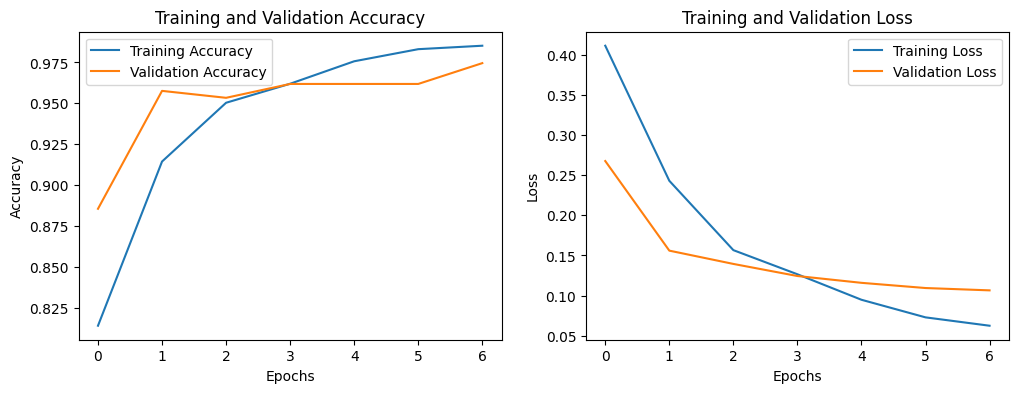

10/10 [==============================] - 79s 8s/step - loss: 0.1065 - accuracy: 0.9746
Test Accuracy: 97.46%


In [25]:
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Flatten, Dense, Dropout
# from tensorflow.keras.optimizers import Adam
# import matplotlib.pyplot as plt

input_shape = (310, 310, 3)

# Menggunakan model VGG16 sebagai base model
base_model = tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=input_shape)

for layer in base_model.layers:
    layer.trainable = False

# Membangun model
model = Sequential([
    base_model,
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Kompilasi model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Callback kustom untuk menghentikan pelatihan jika akurasi training mencapai 0.91 dan akurasi validasi mencapai lebih dari 0.95
class EarlyStoppingAtAccuracy(tf.keras.callbacks.Callback):
    def __init__(self, train_accuracy=0.92, val_accuracy=0.965):
        super(EarlyStoppingAtAccuracy, self).__init__()
        self.train_accuracy = train_accuracy
        self.val_accuracy = val_accuracy

    def on_epoch_end(self, epoch, logs=None):
        if logs.get('accuracy') >= self.train_accuracy and logs.get('val_accuracy') > self.val_accuracy:
            print(f"\nReached {self.train_accuracy*100}% training accuracy and {self.val_accuracy*100}% validation accuracy. Stopping training!")
            self.model.stop_training = True

# Memasukkan callback ke dalam fit
early_stopping = EarlyStoppingAtAccuracy(train_accuracy=0.92, val_accuracy=0.965)

# Melatih model
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=test_generator,
    callbacks=[early_stopping]  # Menambahkan callback di sini
)

# Ringkasan model
model.summary()

# Plot hasil pelatihan
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

# Evaluasi model
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ ?                      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/100


c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


16/16 ━━━━━━━━━━━━━━━━━━━━ 185s 10s/step - accuracy: 0.5530 - loss: 0.8110 - val_accuracy: 0.9091 - val_loss: 0.3026
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 150s 9s/step - accuracy: 0.8452 - loss: 0.3552 - val_accuracy: 0.9256 - val_loss: 0.2124
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 130s 7s/step - accuracy: 0.9254 - loss: 0.2148 - val_accuracy: 0.9421 - val_loss: 0.1574
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 133s 8s/step - accuracy: 0.9451 - loss: 0.1727 - val_accuracy: 0.9504 - val_loss: 0.1393
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 136s 8s/step - accuracy: 0.9751 - loss: 0.1242 - val_accuracy: 0.9587 - val_loss: 0.1338
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 144s 9s/step - accuracy: 0.9721 - loss: 0.1234 - val_accuracy: 0.9504 - val_loss: 0.1232
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 167s 9s/step - accuracy: 0.9554 - loss: 0.1117 - val_accuracy: 0.9587 - val_loss: 0.1233
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 146s 8s/step - accuracy: 0.9851 - loss: 0.0866 - val_accuracy: 0.9669 - val_

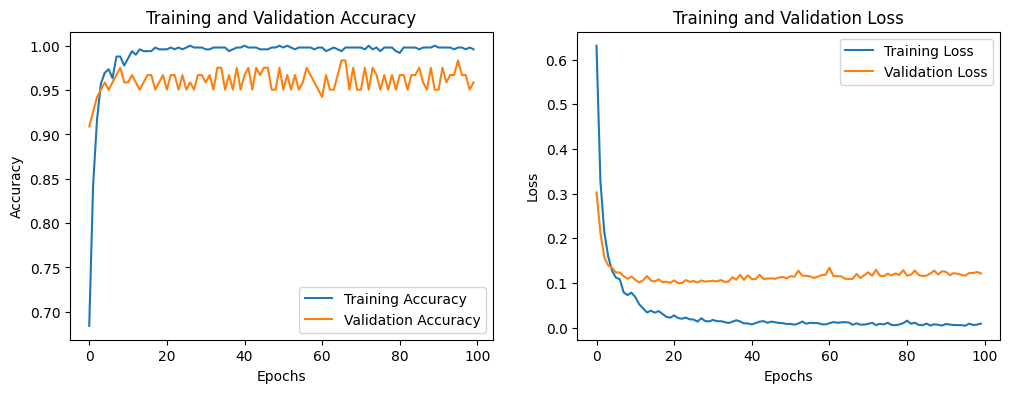

4/4 ━━━━━━━━━━━━━━━━━━━━ 30s 7s/step - accuracy: 0.9543 - loss: 0.1608
Test Accuracy: 95.87%


In [3]:
input_shape = (224, 224, 3)


base_model = tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=input_shape)

for layer in base_model.layers:
    layer.trainable = False


model = Sequential([
    base_model,
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])


model.summary()


history = model.fit(
    train_generator,
    epochs=12,  
    validation_data=test_generator
)


plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

SAVE MODEL .H5

In [31]:
# model.summary()
# Menyimpan arsitektur model ke file JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

# Menyimpan bobot model ke file HDF5
model.save_weights("model_weights.weights.h5")


In [32]:
from tensorflow.keras.models import model_from_json

# Memuat arsitektur model dari file JSON
with open("model.json", "r") as json_file:
    loaded_model_json = json_file.read()
    loaded_model = model_from_json(loaded_model_json)

# Memuat bobot ke dalam model dari file dengan ekstensi yang benar
loaded_model.load_weights("model_weights.weights.h5")

SAVE MODEL .JSON

In [33]:
saved_model_path = "./my_model.h5"

model.save(saved_model_path)

D:\anaconda\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


SAVE MODEL PICKLE

In [34]:
import pickle
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [12]:
# with open('model.pkl', 'rb') as f:
#     loaded_model = pickle.load(f)

c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\saving\saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 6 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


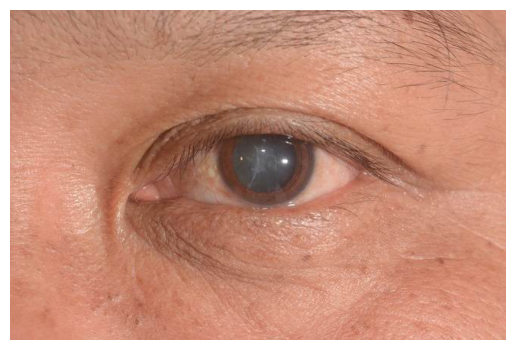

In [28]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Ganti dengan path ke file gambar yang ingin Anda unggah
image_path = "uji/contoh.jpg"

# Buka gambar menggunakan PIL
image = Image.open(image_path)

# Menampilkan gambar
plt.imshow(image)
plt.axis('off')
plt.show()

# Mengonversi gambar menjadi array numpy
image_array = np.array(image.resize((200, 200))) / 255.0  # Mengubah ukuran dan normalisasi
image_array = np.expand_dims(image_array, axis=0)  # Menambahkan di



In [29]:

# Melakukan prediksi
prediction = model.predict(image_array)

# Menampilkan nilai prediksi
print(f"Nilai prediksi: {prediction[0][0]}")

# Menampilkan hasil prediksi
if prediction[0][0] > 0.5:
    print("Gambar tersebut diprediksi masuk kelas Normal")
else:
    print("Gambar tersebut diprediksi masuk kelas Cataract")


1/1 [==============================] - 0s 142ms/step
Nilai prediksi: 0.6015974879264832
Gambar tersebut diprediksi masuk kelas Normal


In [29]:
# Mendapatkan daftar kelas beserta indeksnya
classes = test_generator.class_indices

# Membalikkan kunci dan nilai di dictionary
classes = {v: k for k, v in classes.items()}

# Menampilkan daftar kelas
print("Kelas yang ditemukan:")
for index, class_name in classes.items():
    print(f"Kelas {index}: {class_name}")

Kelas yang ditemukan:
Kelas 0: cataract
Kelas 1: normal


FileUpload(value={}, accept='image/*', description='Upload')

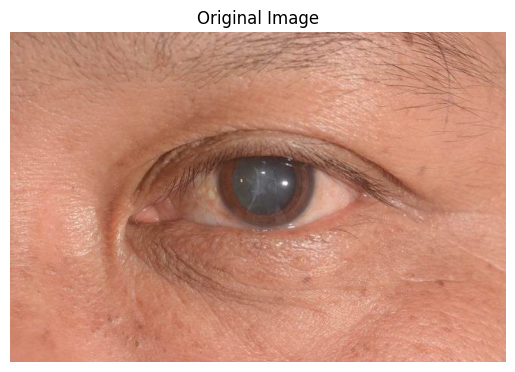

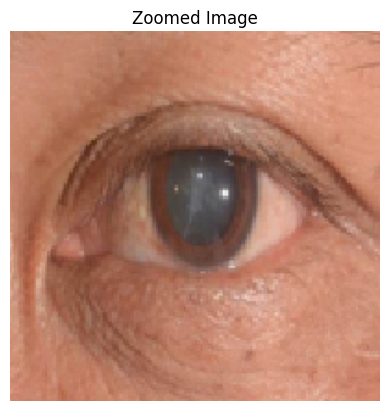

1/1 [==============================] - 0s 137ms/step
Nilai prediksi: 0.3409791886806488
Gambar tersebut diprediksi masuk kelas Cataract


In [30]:
import io
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import ipywidgets as widgets
import tensorflow as tf
from tensorflow.keras.models import load_model  # Pastikan model Anda di-load
from IPython.display import display

# Asumsikan Anda sudah memiliki model yang dilatih sebelumnya
# model = load_model('path_to_your_model.h5')

# Buat fungsi untuk zoom gambar menggunakan TensorFlow
def zoom_image(image_array, zoom_factor):
    height, width, _ = image_array.shape
    new_height, new_width = int(height * zoom_factor), int(width * zoom_factor)

    image = tf.image.resize(image_array, [new_height, new_width], method='nearest')
    crop_height = (new_height - height) // 2
    crop_width = (new_width - width) // 2
    cropped_image = image[crop_height:crop_height+height, crop_width:crop_width+width, :]
    
    return cropped_image.numpy()

# Buat widget untuk upload file
uploader = widgets.FileUpload(accept='image/*', multiple=False)

# Fungsi untuk menangani upload dan augmentasi gambar
def on_upload_change(change):
    if uploader.value:
        # Mengambil gambar dari widget upload
        uploaded_file = list(uploader.value.values())[0]
        image = Image.open(io.BytesIO(uploaded_file['content']))

        # Menampilkan gambar asli
        plt.imshow(image)
        plt.axis('off')
        plt.title("Original Image")
        plt.show()

        # Mengonversi gambar menjadi array numpy dan normalisasi
        image_array = np.array(image.resize((200, 200))) / 255.0  # Mengubah ukuran dan normalisasi

        # Zoom gambar
        zoom_factor = 1.5
        zoomed_image_array = zoom_image(image_array, zoom_factor)

        # Menampilkan gambar yang di-zoom
        plt.imshow(zoomed_image_array)
        plt.axis('off')
        plt.title("Zoomed Image")
        plt.show()

        # Menyiapkan gambar untuk prediksi model (menambahkan dimensi batch)
        image_array_for_model = np.expand_dims(zoomed_image_array, axis=0)

        # Melakukan prediksi
        prediction = model.predict(image_array_for_model)
        
        print(f"Nilai prediksi: {prediction[0][0]}")

        # Menampilkan hasil prediksi
        if prediction[0][0] > 0.5:
            print("Gambar tersebut diprediksi masuk kelas Normal")
        else:
            print("Gambar tersebut diprediksi masuk kelas Cataract")

# Tampilkan widget dan sambungkan ke fungsi
uploader.observe(on_upload_change, names='value')
display(uploader)